In [1]:
import os
os.environ["OPENCV_IO_ENABLE_OPENEXR"] = "1"

import numpy as np
import cv2
import imageio.v3 as imageio
import torch
import matplotlib.pyplot as plt

data_dir = '/home/jingkun/Dataset/CoFusion/'
sequence = 'car4-full'

color_dir = os.path.join(data_dir, sequence + '/', 'colour/')
depth_dir = os.path.join(data_dir, sequence + '/', 'depth_original/')

num_rgb_frames = len([f for f in os.listdir(color_dir) if os.path.isfile(color_dir + f)])
num_depth_frames = len([f for f in os.listdir(depth_dir) if os.path.isfile(depth_dir + f)])

print('Sequence {} contains {} RGB images and {} depth images.'.format(sequence, num_rgb_frames, num_depth_frames))

Sequence car4-full contains 480 RGB images and 480 depth images.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(540, 960, 3)


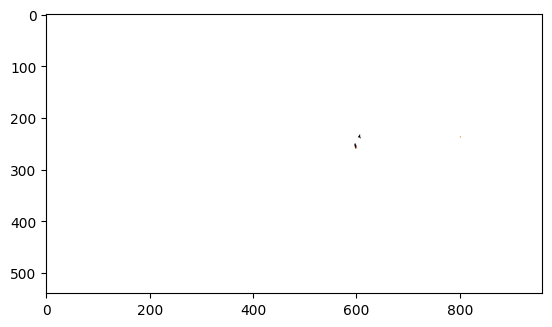

In [2]:
color = np.asarray(imageio.imread(color_dir + os.listdir(color_dir)[1]), dtype=float)
# test1 = '/home/jingkun/Dataset/ICL/living_room_traj2_frei_png/rgb/0.png'
# print(color)
# color = np.asarray(imageio.imread(test1), dtype=float)
print(color.shape)
fig = plt.figure()
plt.imshow(color)
plt.show()

In [5]:
# depth = cv2.imread(depth_dir + os.listdir(depth_dir)[1], cv2.IMREAD_UNCHANGED)
depth = cv2.imread(depth_dir + 'Depth0001.exr', cv2.IMREAD_UNCHANGED)
print(depth.dtype)
print(depth.shape)
print(depth)
# np.asarray(imageio.imread(os.listdir(depth_dir)[0]), dtype=np.int64)

float32
(540, 960)
[[3.0288928 3.0303032 3.0317152 ... 2.1548815 2.1527166 2.1505566]
 [3.0258832 3.026942  3.0277808 ... 2.1556058 2.1534398 2.151278 ]
 [3.02021   3.0210445 3.0218797 ... 2.1563308 2.1541631 2.1519997]
 ...
 [1.1667583 1.1667508 1.1667432 ... 1.1598787 1.1598705 1.1598624]
 [1.1653463 1.1653386 1.1653311 ... 1.1584837 1.1584753 1.158467 ]
 [1.1639378 1.1639302 1.1639228 ... 1.1570919 1.1570836 1.1570755]]


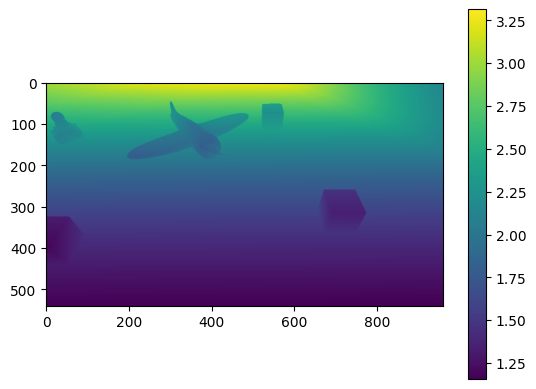

In [6]:
depth = np.asarray(imageio.imread(depth_dir + os.listdir(depth_dir)[1]), dtype=float)
# depth = depth[:, :, 0]
fig = plt.figure()
plt.imshow(depth)
plt.colorbar()
plt.show()

In [4]:
row, col, channel = depth.shape
if depth.shape[2] == 3:
    new_depth = np.empty((row, col), dtype=np.float32).reshape(-1)
    depth_idx = 0
    for i in range(row):
        for j in range(col):
            new_depth[depth_idx] = depth[i][j][0]
            depth_idx += 1

new_depth = np.reshape(new_depth, (row, col))
print(new_depth.shape)

ValueError: not enough values to unpack (expected 3, got 2)

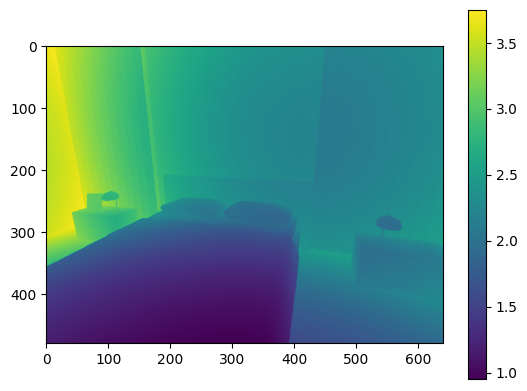

In [35]:
fig = plt.figure()
plt.imshow(new_depth)
plt.colorbar()
plt.show()

In [36]:
os.path.dirname(data_dir)

'/home/jingkun/Dataset/CoFusion'

In [41]:
dir_path = "/home/jingkun/Dataset/CoFusion/room4-full/trajectories/"
file_name = "gt-cam-0.txt"
file_path = os.path.join(dir_path, file_name)
with open(file_path, "r") as f:
    lines = f.readlines()

for line_num, line in enumerate(lines):
    line = line.strip().split()
    a = int(line[0])
    # print(a)
    print(os.path.normpath(os.path.join(dir_path[:-13], "colour/Color{0:04d}".format(int(line[0])))))

/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0001
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0002
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0003
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0004
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0005
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0006
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0007
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0008
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0009
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0010
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0011
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0012
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0013
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0014
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0015
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color0016
/home/jingkun/Dataset/CoFusion/room4-full/colour/Color00

In [42]:
a = np.array([0, 1, 2])
a[1:]

array([1, 2])